Linear regression by using Deep Neural network: Implement Boston housing price prediction
problem by Linear regression using Deep Neural network. Use Boston House price prediction
dataset.

In [1]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load dataset from UCI repository
data = fetch_openml(data_id=531)

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
print(df.head(5))


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  target  
0  396.90   4.98    24.0  
1  396.90   9.14    21.6  
2  392.83   4.03    34.7  
3  394.63   2.94    33.4  
4  396.90   5.33    36.2  


In [2]:
 data = fetch_openml(data_id=531)

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
 scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
 model = tf.keras.models.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
2
 # Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split=0.2)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 643.9668 - val_loss: 538.5846
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 589.4406 - val_loss: 507.0188
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 537.2333 - val_loss: 470.9958
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 462.0255 - val_loss: 426.6866
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 489.3096 - val_loss: 371.9767
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 399.1812 - val_loss: 307.2765
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296.7974 - val_loss: 236.9038
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 244.3759 - val_loss: 169.5194
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 162.3032 - val_loss: 117.0605
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 129.1309 - val_loss: 81.1631
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.0238 - val_loss: 60.5970
Epoch 12/100
11/11 ━━

In [5]:
 # Evaluate the model
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1029 


12.356955528259277

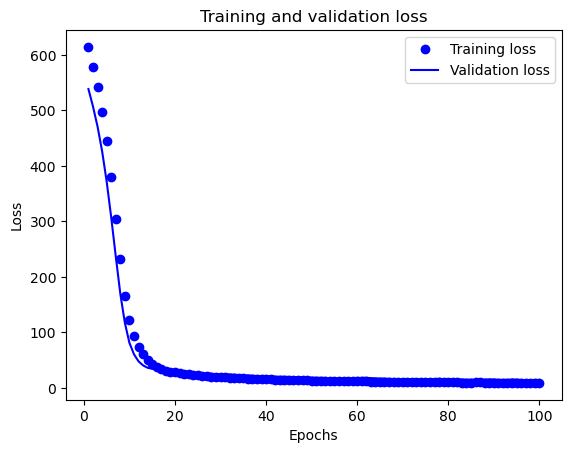

In [7]:
 # Visualize the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


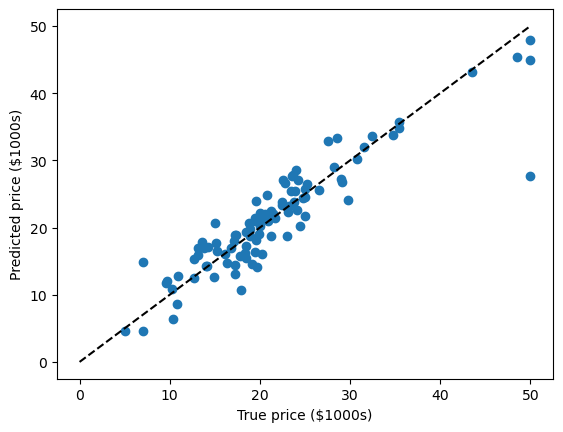

In [8]:
 # Visualize the linear regression graph
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()


In [9]:
X_train.shape

(404, 13)

In [10]:
X_train[0]

array([ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
       -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.75350503])

In [11]:
custom_input = np.array([[0.2, 0.0, 10.0, 0.0, 0.5, 6.0, 70.0, 3.0, 4.0, 400.0,17.0, 360.0, 15.0]])
scaled_custom_input = scaler.transform(custom_input)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
 custom_prediction = model.predict(scaled_custom_input)
print(f"Custom Input Prediction: {custom_prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Custom Input Prediction: 17.20086669921875
